# Latest dataset exploration - n=133
This notebook focuses on the implementation of the Cob class, which encompasses the analysis developed as part of the initial exploration of 15min sampled data as the output of Isabella Dagen's insulin-need project preprocessing. It uses the Cob class from cob_analysis.py to analyse the data and create peak features to investigate the existence of diurnal patterns in the data.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from src.cob_analysis import Cob
from src.config import INTERIM_DATA_DIR

2025-05-16 22:14:53.661 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: C:\Users\ross\PycharmProjects\masters_project


In [2]:
# Previous preprocessing - 15 min sampled data based on earlier limited dataset
cob_old = Cob()
cob_old.read_interim_data(file_name='15min_iob_cob_bg_old_sample',
                      file_type='csv',
                      sampling_rate=15)

FileNotFoundError: File not found.

In [15]:
# Compare briefly against the new dataset
cob_new = Cob()
cob_new.read_interim_data(file_name='15min_iob_cob_bg',
                      file_type='csv',
                      sampling_rate=15)

Number of records: 786757
Number of people: 133
Systems used: 	['OpenAPS']
Categories (1, object): ['OpenAPS']


In [20]:
# And compare to make sure missing values etc are the same
pid = 221634
cob_old.get_person_data(pid)
cob_new.get_person_data(pid)
cob_old.summarise_missing_for_individual()
cob_new.summarise_missing_for_individual()

MISSING DATA SUMMARY FOR 221634
Start of time series: 2018-03-16 20:30:00+00:00
End of time series: 2018-07-18 21:30:00+00:00
Samples: 2918
NaN values: 0
15-minute intervals in range: 11909
Missing samples: 8991
Total missing (NaNs and missing): 8991
Days in range: 124.05
Total % missing: 75.50
Days with COB data: 107
Days with missing data: 17.05
Number of gaps: 0
Mean length of gaps (in days): nan

MISSING DATA SUMMARY FOR 221634
Start of time series: 2018-03-16 20:30:00
End of time series: 2018-07-18 21:30:00
Samples: 2918
NaN values: 0
15-minute intervals in range: 11909
Missing samples: 8991
Total missing (NaNs and missing): 8991
Days in range: 124.05
Total % missing: 75.50
Days with COB data: 107
Days with missing data: 17.05
Number of gaps: 0
Mean length of gaps (in days): nan



In [23]:
# Now lets look at processing the dataset to find the peaks, which will interpolate (to avoid increasing the number of peaks artificially) and same the processed data as a parquet file
cob_new.pre_process_batch(height=15, distance=5)

No IDs provided. Processing all 133 records by default.
Processing ID: 221634.0

189 peaks identified using parameters h=15 and d=5, and added to individual_dataset as a new column.
For ID 221634.0: 33 days with no peaks removed, 92 remain.
Processing ID: 309157.0

19 peaks identified using parameters h=15 and d=5, and added to individual_dataset as a new column.
For ID 309157.0: 186 days with no peaks removed, 19 remain.
Processing ID: 897741.0

108 peaks identified using parameters h=15 and d=5, and added to individual_dataset as a new column.
For ID 897741.0: 325 days with no peaks removed, 38 remain.
Processing ID: 1352464.0

301 peaks identified using parameters h=15 and d=5, and added to individual_dataset as a new column.
For ID 1352464.0: 489 days with no peaks removed, 108 remain.
Processing ID: 2033176.0

17 peaks identified using parameters h=15 and d=5, and added to individual_dataset as a new column.
For ID 2033176.0: 41 days with no peaks removed, 4 remain.
Processing ID:

cob max         day      time  \
id         datetime                                             
221634.0   2018-03-21 00:00:00      NaN  2018-03-21  00:00:00   
           2018-03-21 00:15:00      NaN  2018-03-21  00:15:00   
           2018-03-21 00:30:00      NaN  2018-03-21  00:30:00   
           2018-03-21 00:45:00      NaN  2018-03-21  00:45:00   
           2018-03-21 01:00:00      NaN  2018-03-21  01:00:00   
...                                 ...         ...       ...   
99908129.0 2018-01-31 22:45:00      NaN  2018-01-31  22:45:00   
           2018-01-31 23:00:00      NaN  2018-01-31  23:00:00   
           2018-01-31 23:15:00      0.0  2018-01-31  23:15:00   
           2018-01-31 23:30:00      0.0  2018-01-31  23:30:00   
           2018-01-31 23:45:00      0.0  2018-01-31  23:45:00   

                                cob interpolate  peak  
id         datetime                                    
221634.0   2018-03-21 00:00:00              0.0     0  
           2018-03-21 00:15:00              0.0     0  
           2018-03-21 00:30:00              0.0     0  
           2018-03-21 00:45:00              0.0     0  
           2018-03-21 01:00:00              0.0     0  
...                                         ...   ...  
99908129.0 2018-01-31 22:45:00              0.0     0  
           2018-01-31 23:00:00              0.0     0  
           2018-01-31 23:15:00              0.0     0  
           2018-01-31 23:30:00              0.0     0  
           2018-01-31 23:45:00              0.0     0  

[1015411 rows x 5 columns]

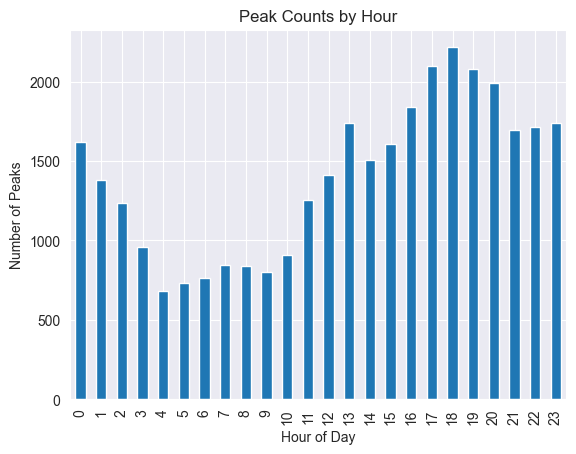

In [25]:
cob_old.pre_process_batch(height=15, distance=5, suppress=True)
cob_old.plot_cob_by_hour()

No IDs provided. Processing all 116 records by default.


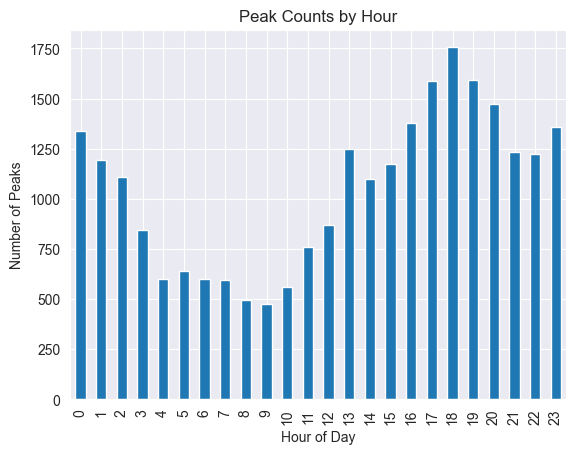

In [29]:
cob_new.plot_cob_by_hour()

This has now shown that despite the changes to localisation of datetime in the dataset, the peaks are still similar. We will focus on finding a set of well-behaved samples with rich COB data, and might help determine how far they are from the population profile.

In [ ]:
df_stats = cob_new.summarise_missing_for_individual()